In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv("C:/Users/ACER/Downloads/disease_prediction_random_forest.csv")

# View dataset
print(df.head())


   Age  BloodPressure  Glucose   BMI  Insulin  SkinThickness  \
0   45             80      150  25.3      130             20   
1   50             90      180  28.1      180             35   
2   23             70       85  22.5       90             15   
3   35             85      120  26.7      100             25   
4   60             88      160  30.0      150             30   

   DiabetesPedigreeFunc  Pregnancies  Outcome  
0                   0.5            2        1  
1                   1.2            3        1  
2                   0.3            0        0  
3                   0.8            1        0  
4                   1.5            4        1  


In [5]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [11]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



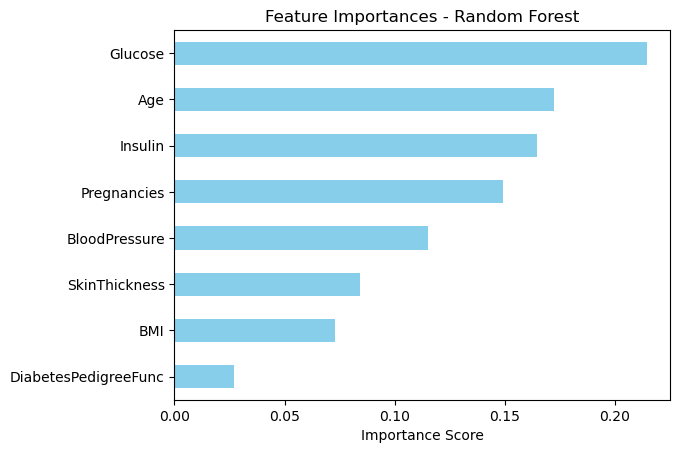

In [13]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.show()
